In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [49]:
#download the weather images and put them in a directory
path = R'/Users/shaquillelee/Documents/Specialization /Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', '.DS_Store', 'Shine', 'Sunrise']


In [50]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [51]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [72]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 30,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 417ms/step - accuracy: 0.8380 - loss: 0.0554 - val_accuracy: 0.8426 - val_loss: 0.0630
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.8750 - val_loss: 0.0204
Epoch 3/30


2024-11-15 21:41:45.495196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/shaquillelee/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-11-15 21:41:45.588128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 534ms/step - accuracy: 0.9236 - loss: 0.0341 - val_accuracy: 0.8056 - val_loss: 0.0852
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.0840 - val_accuracy: 0.6250 - val_loss: 0.1317
Epoch 5/30


2024-11-15 21:42:26.309292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:42:26.420223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 451ms/step - accuracy: 0.8877 - loss: 0.0446 - val_accuracy: 0.7037 - val_loss: 0.1235
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.0844 - val_accuracy: 0.6250 - val_loss: 0.1276
Epoch 7/30


2024-11-15 21:43:00.743920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:43:00.832330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 437ms/step - accuracy: 0.8450 - loss: 0.0531 - val_accuracy: 0.6389 - val_loss: 0.1372
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5833 - loss: 0.0993 - val_accuracy: 0.6250 - val_loss: 0.0983
Epoch 9/30


2024-11-15 21:43:33.993423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:43:34.072787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 425ms/step - accuracy: 0.8351 - loss: 0.0628 - val_accuracy: 0.5417 - val_loss: 0.1968
Epoch 10/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.0990 - val_accuracy: 0.6250 - val_loss: 0.1649
Epoch 11/30


2024-11-15 21:44:06.390196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:44:06.479431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 424ms/step - accuracy: 0.8379 - loss: 0.0559 - val_accuracy: 0.7639 - val_loss: 0.0921
Epoch 12/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8333 - loss: 0.0359 - val_accuracy: 0.7500 - val_loss: 0.0807
Epoch 13/30


2024-11-15 21:44:38.735283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:44:38.829582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 425ms/step - accuracy: 0.8757 - loss: 0.0494 - val_accuracy: 0.8519 - val_loss: 0.0530
Epoch 14/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.8750 - val_loss: 0.0679
Epoch 15/30


2024-11-15 21:45:11.219916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:45:11.302549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 421ms/step - accuracy: 0.8882 - loss: 0.0412 - val_accuracy: 0.7870 - val_loss: 0.0860
Epoch 16/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9167 - loss: 0.0334 - val_accuracy: 0.6250 - val_loss: 0.1332
Epoch 17/30


2024-11-15 21:45:43.359035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:45:43.440750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 418ms/step - accuracy: 0.8862 - loss: 0.0434 - val_accuracy: 0.8056 - val_loss: 0.0805
Epoch 18/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8750 - val_loss: 0.0668
Epoch 19/30


2024-11-15 21:46:15.257729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:46:15.346251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 426ms/step - accuracy: 0.8990 - loss: 0.0386 - val_accuracy: 0.7963 - val_loss: 0.0829
Epoch 20/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8333 - loss: 0.0638 - val_accuracy: 0.7500 - val_loss: 0.0833
Epoch 21/30


2024-11-15 21:46:47.770685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:46:47.865638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 414ms/step - accuracy: 0.9091 - loss: 0.0390 - val_accuracy: 0.8241 - val_loss: 0.0756
Epoch 22/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9167 - loss: 0.0132 - val_accuracy: 0.6250 - val_loss: 0.1646
Epoch 23/30


2024-11-15 21:47:19.416866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:47:19.499626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 422ms/step - accuracy: 0.9486 - loss: 0.0240 - val_accuracy: 0.8194 - val_loss: 0.0745
Epoch 24/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9167 - loss: 0.0448 - val_accuracy: 0.6250 - val_loss: 0.1309
Epoch 25/30


2024-11-15 21:47:51.711235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:47:51.796854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 412ms/step - accuracy: 0.8969 - loss: 0.0375 - val_accuracy: 0.8194 - val_loss: 0.0825
Epoch 26/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9167 - loss: 0.0271 - val_accuracy: 0.7500 - val_loss: 0.0938
Epoch 27/30


2024-11-15 21:48:23.243688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:48:23.331752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 423ms/step - accuracy: 0.9056 - loss: 0.0347 - val_accuracy: 0.8009 - val_loss: 0.0856
Epoch 28/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9167 - loss: 0.0287 - val_accuracy: 0.8750 - val_loss: 0.0355
Epoch 29/30


2024-11-15 21:48:55.499344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:48:55.578604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 429ms/step - accuracy: 0.9074 - loss: 0.0338 - val_accuracy: 0.8843 - val_loss: 0.0496
Epoch 30/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 0.5000 - val_loss: 0.1425


2024-11-15 21:49:28.189389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-15 21:49:28.274160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [73]:
results = pd.DataFrame(model.history.history)

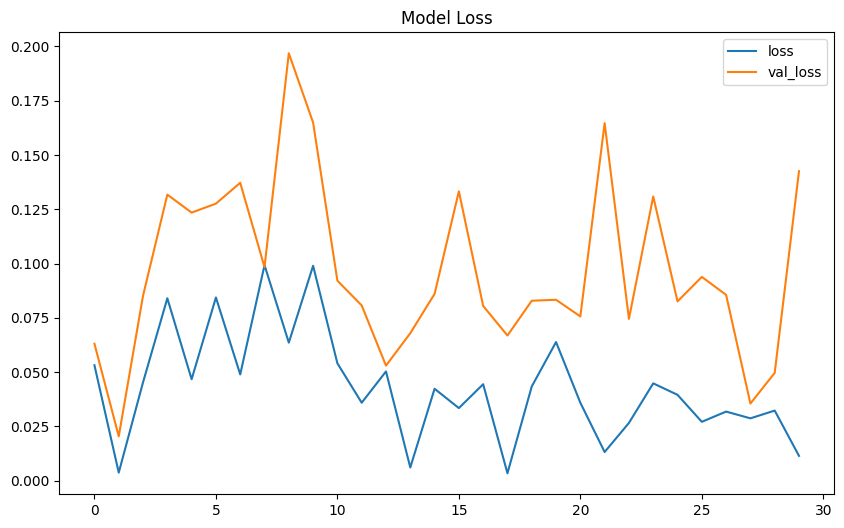

In [74]:

results[['loss', 'val_loss']].plot(title='Model Loss', figsize=(10, 6))

# Save the plot as a file 
plt.savefig('./loss.png')

# Show the plot
plt.show()


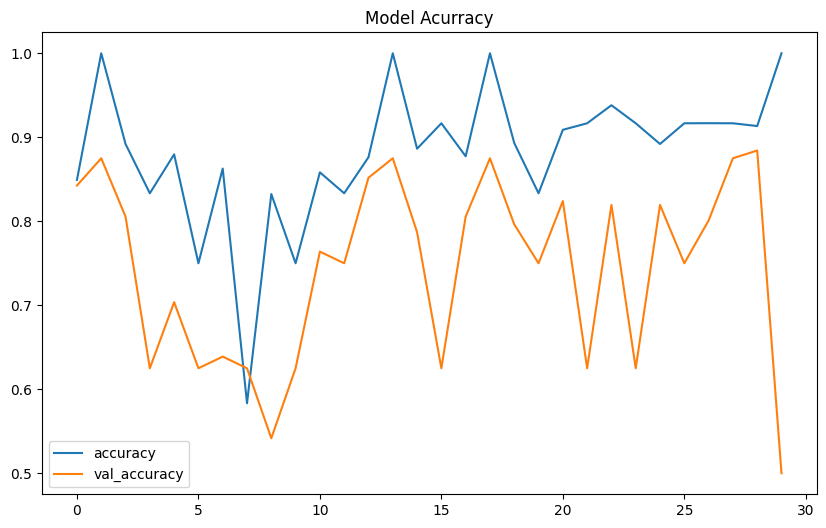

In [75]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy',figsize=(10, 6))
# Save the plot as a file 
plt.savefig('./accuracy.png')
# Show the plot
plt.show()

In [76]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 1.0, Val_Accuracy: 0.5
Loss: 0.011391870677471161, Val_Loss: 0.1425381749868393


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step


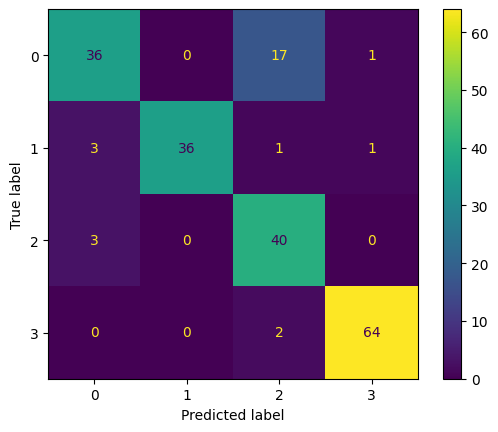

In [77]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [68]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)
        plt.show()
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


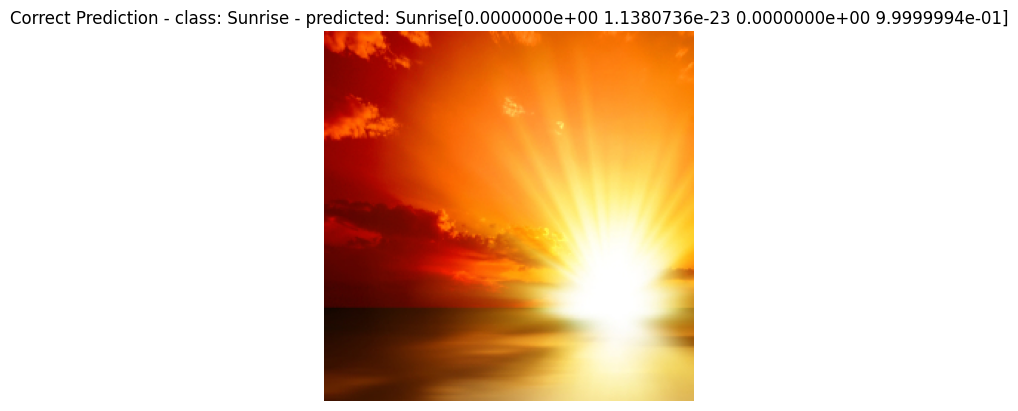

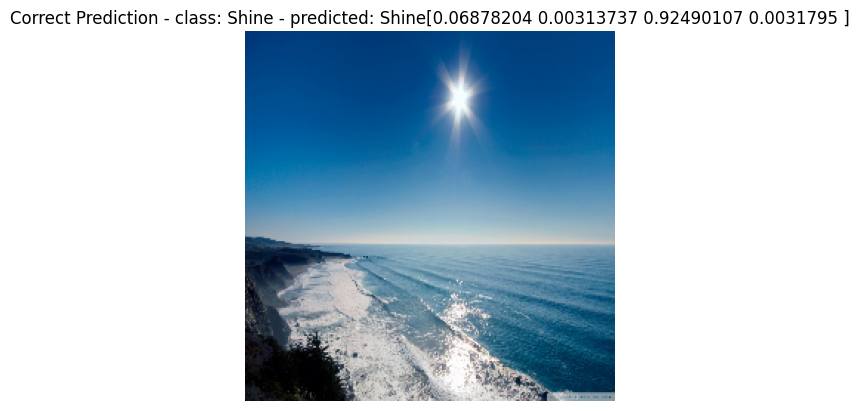

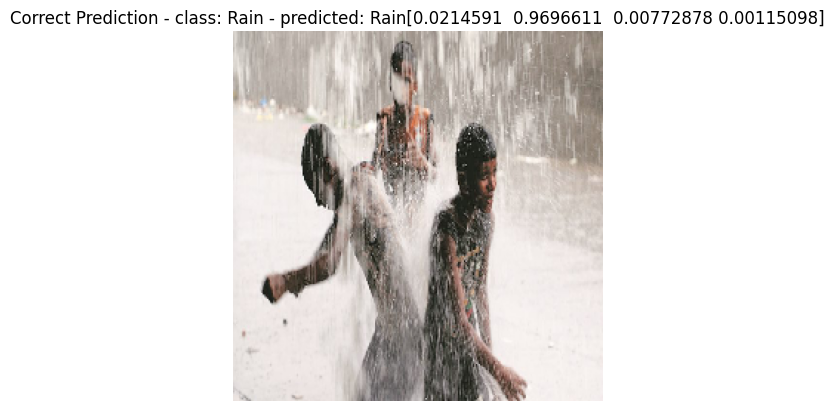

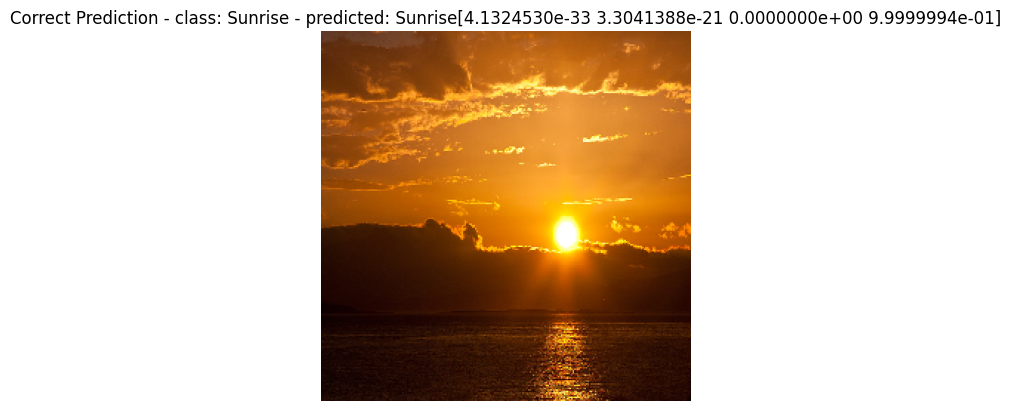

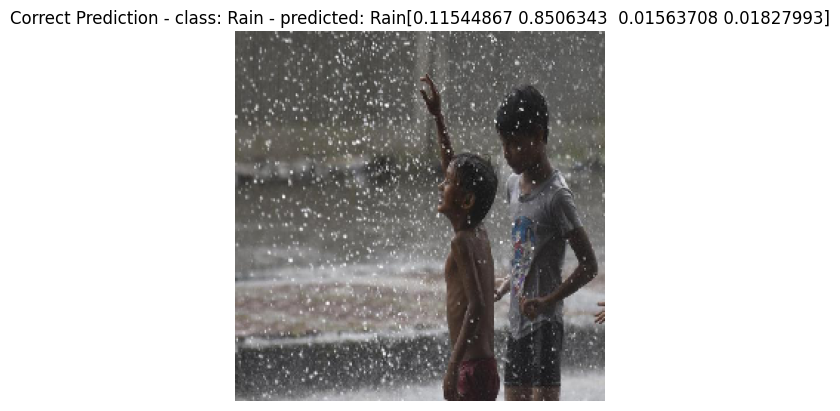

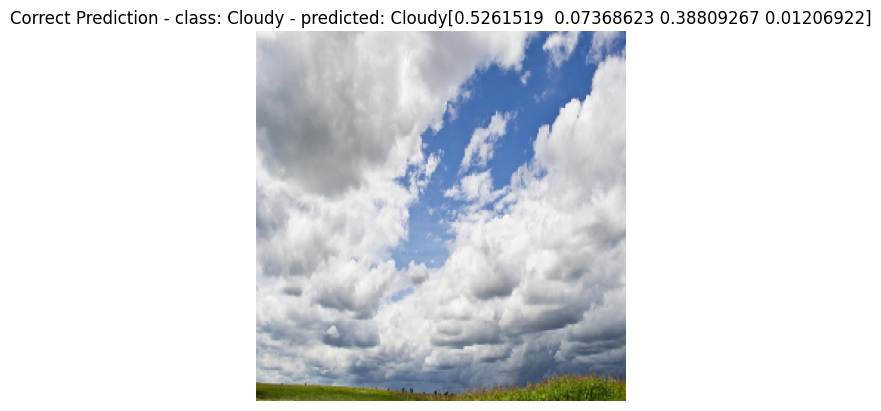

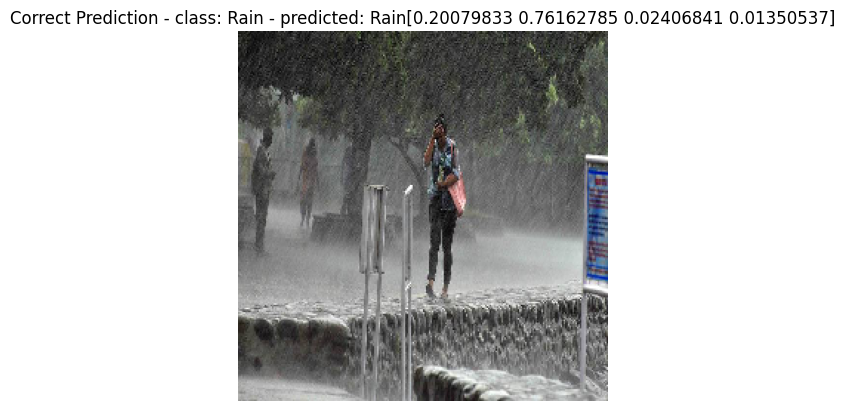

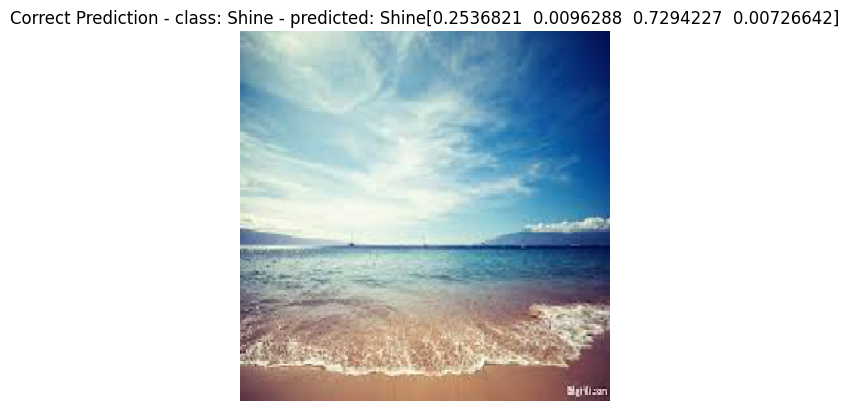

In [71]:
predict_one(model, 8)